<a href="https://colab.research.google.com/github/garimaahuja112/Clustering-Analysis-Garima-102203385/blob/main/102203385.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.drop(columns=['DEATH_EVENT'], inplace=True)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 108.0 MB/s eta 0:00:00
   ━━━

In [4]:
from pycaret.clustering import *

s=setup(data=df)

,Description,Value
0,Session id,7870
1,Original data shape,"(299, 12)"
2,Transformed data shape,"(299, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [46]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from pycaret.clustering import *
import pandas as pd

# Define preprocessing variants
preprocess_options = {
    'None': {'normalize': False, 'transformation': False, 'pca': False},
    'Normalization': {'normalize': True, 'transformation': False, 'pca': False},
    'Transformation': {'normalize': False, 'transformation': True, 'pca': False},
    'PCA': {'normalize': False, 'transformation': False, 'pca': True},
    'T + N': {'normalize': True, 'transformation': True, 'pca': False},
    'T + N + PCA': {'normalize': True, 'transformation': True, 'pca': True},
}

# Define models and clustering methods
models = {
    'KMeans': 'kmeans',
    'Hierarchical': 'hclust',
    'Spectral': 'sc'
}

# Number of clusters to evaluate
cluster_counts = [3, 4, 5]

# Store results in a list of dicts
results = []

# Begin model-preprocessing-cluster loop
for model_name, model_id in models.items():
    for prep_name, prep in preprocess_options.items():
        for k in cluster_counts:
            print(f'\nModel: {model_name} | Preprocessing: {prep_name} | Clusters: {k}')
            try:
                # Setup PyCaret environment
                setup(data=df.copy(),
                      normalize=prep['normalize'],
                      transformation=prep['transformation'],
                      pca=prep['pca'],
                      # session_id=123,
                      verbose=False)

                # Train the model
                model = create_model(model_id, num_clusters=k)

                # Assign clusters to dataset
                clustered_df = assign_model(model)

                # Get cluster labels and features
                labels = clustered_df['Cluster']
                features = get_config('X')

                # Evaluate metrics
                sil = silhouette_score(features, labels)
                ch = calinski_harabasz_score(features, labels)
                db = davies_bouldin_score(features, labels)

                # Save result
                results.append({
                    'Model': model_name,
                    'Preprocessing': prep_name,
                    'Clusters': k,
                    'Silhouette Score': round(sil, 3),
                    'Calinski-Harabasz Index': round(ch, 1),
                    'Davies-Bouldin Index': round(db, 3)
                })

                # Print results
                print(f'Silhouette Score: {sil:.3f}')
                print(f'Calinski-Harabasz Index: {ch:.1f}')
                print(f'Davies-Bouldin Index: {db:.3f}')

            except Exception as e:
                print(f'Error: {e}')
                results.append({
                    'Model': model_name,
                    'Preprocessing': prep_name,
                    'Clusters': k,
                    'Silhouette Score': 'Error',
                    'Calinski-Harabasz Index': 'Error',
                    'Davies-Bouldin Index': 'Error'
                })

# Convert to DataFrame and export
results_df = pd.DataFrame(results)
results_df.to_csv('clustering_results.csv', index=False)
print("\nResults saved to 'clustering_results.csv'")


Model: KMeans | Preprocessing: None | Clusters: 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5118,376.5628,0.6215,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: 0.512
Calinski-Harabasz Index: 376.6
Davies-Bouldin Index: 0.621

Model: KMeans | Preprocessing: None | Clusters: 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5531,493.4309,0.4867,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: 0.553
Calinski-Harabasz Index: 493.4
Davies-Bouldin Index: 0.487

Model: KMeans | Preprocessing: None | Clusters: 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5531,588.3841,0.4889,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: 0.553
Calinski-Harabasz Index: 588.4
Davies-Bouldin Index: 0.489

Model: KMeans | Preprocessing: Normalization | Clusters: 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1029,29.0990,2.7448,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.050
Calinski-Harabasz Index: 2.5
Davies-Bouldin Index: 10.512

Model: KMeans | Preprocessing: Normalization | Clusters: 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1019,26.2587,2.4716,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.109
Calinski-Harabasz Index: 2.3
Davies-Bouldin Index: 21.525

Model: KMeans | Preprocessing: Normalization | Clusters: 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1000,23.8463,2.4383,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.118
Calinski-Harabasz Index: 2.5
Davies-Bouldin Index: 25.105

Model: KMeans | Preprocessing: Transformation | Clusters: 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5495,482.1320,0.5672,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.036
Calinski-Harabasz Index: 0.1
Davies-Bouldin Index: 254.748

Model: KMeans | Preprocessing: Transformation | Clusters: 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5710,624.5236,0.5106,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.072
Calinski-Harabasz Index: 2.4
Davies-Bouldin Index: 14.355

Model: KMeans | Preprocessing: Transformation | Clusters: 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5067,576.9453,0.5270,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.094
Calinski-Harabasz Index: 1.0
Davies-Bouldin Index: 200.748

Model: KMeans | Preprocessing: PCA | Clusters: 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5481,390.9995,0.5652,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: 0.548
Calinski-Harabasz Index: 391.0
Davies-Bouldin Index: 0.565

Model: KMeans | Preprocessing: PCA | Clusters: 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5531,493.4309,0.4867,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: 0.553
Calinski-Harabasz Index: 493.4
Davies-Bouldin Index: 0.487

Model: KMeans | Preprocessing: PCA | Clusters: 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5358,602.3455,0.5090,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: 0.536
Calinski-Harabasz Index: 602.3
Davies-Bouldin Index: 0.509

Model: KMeans | Preprocessing: T + N | Clusters: 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0998,30.9908,2.6549,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.019
Calinski-Harabasz Index: 0.0
Davies-Bouldin Index: 211.837

Model: KMeans | Preprocessing: T + N | Clusters: 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0995,28.6395,2.4280,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.082
Calinski-Harabasz Index: 3.3
Davies-Bouldin Index: 19.330

Model: KMeans | Preprocessing: T + N | Clusters: 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0928,24.6402,2.4500,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.106
Calinski-Harabasz Index: 4.5
Davies-Bouldin Index: 12.250

Model: KMeans | Preprocessing: T + N + PCA | Clusters: 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0929,29.1879,2.5957,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.031
Calinski-Harabasz Index: 2.6
Davies-Bouldin Index: 15.452

Model: KMeans | Preprocessing: T + N + PCA | Clusters: 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0997,28.6097,2.4389,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.064
Calinski-Harabasz Index: 3.5
Davies-Bouldin Index: 80.115

Model: KMeans | Preprocessing: T + N + PCA | Clusters: 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0947,24.6110,2.4382,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.102
Calinski-Harabasz Index: 9.6
Davies-Bouldin Index: 12.571

Model: Hierarchical | Preprocessing: None | Clusters: 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5035,322.0706,0.5560,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: 0.504
Calinski-Harabasz Index: 322.1
Davies-Bouldin Index: 0.556

Model: Hierarchical | Preprocessing: None | Clusters: 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5395,478.6348,0.5775,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: 0.539
Calinski-Harabasz Index: 478.6
Davies-Bouldin Index: 0.577

Model: Hierarchical | Preprocessing: None | Clusters: 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5410,558.5869,0.4900,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: 0.541
Calinski-Harabasz Index: 558.6
Davies-Bouldin Index: 0.490

Model: Hierarchical | Preprocessing: Normalization | Clusters: 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0988,23.8497,2.3797,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.169
Calinski-Harabasz Index: 6.5
Davies-Bouldin Index: 11.690

Model: Hierarchical | Preprocessing: Normalization | Clusters: 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1051,23.1853,2.1811,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.194
Calinski-Harabasz Index: 4.4
Davies-Bouldin Index: 14.718

Model: Hierarchical | Preprocessing: Normalization | Clusters: 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0918,22.0964,2.2433,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.192
Calinski-Harabasz Index: 4.6
Davies-Bouldin Index: 9.888

Model: Hierarchical | Preprocessing: Transformation | Clusters: 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5189,467.7175,0.6099,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.049
Calinski-Harabasz Index: 1.6
Davies-Bouldin Index: 13.273

Model: Hierarchical | Preprocessing: Transformation | Clusters: 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5408,497.6851,0.5251,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.083
Calinski-Harabasz Index: 1.3
Davies-Bouldin Index: 16.362

Model: Hierarchical | Preprocessing: Transformation | Clusters: 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5639,723.6225,0.4999,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.107
Calinski-Harabasz Index: 1.5
Davies-Bouldin Index: 12.495

Model: Hierarchical | Preprocessing: PCA | Clusters: 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5035,322.0706,0.5560,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: 0.504
Calinski-Harabasz Index: 322.1
Davies-Bouldin Index: 0.556

Model: Hierarchical | Preprocessing: PCA | Clusters: 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5395,478.6348,0.5775,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: 0.539
Calinski-Harabasz Index: 478.6
Davies-Bouldin Index: 0.577

Model: Hierarchical | Preprocessing: PCA | Clusters: 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5410,558.5869,0.4900,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: 0.541
Calinski-Harabasz Index: 558.6
Davies-Bouldin Index: 0.490

Model: Hierarchical | Preprocessing: T + N | Clusters: 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0795,23.5111,2.7879,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.064
Calinski-Harabasz Index: 6.8
Davies-Bouldin Index: 46.898

Model: Hierarchical | Preprocessing: T + N | Clusters: 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0632,21.4581,2.7318,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.073
Calinski-Harabasz Index: 5.3
Davies-Bouldin Index: 9.734

Model: Hierarchical | Preprocessing: T + N | Clusters: 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0640,19.9122,2.6240,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.140
Calinski-Harabasz Index: 4.0
Davies-Bouldin Index: 16.087

Model: Hierarchical | Preprocessing: T + N + PCA | Clusters: 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0795,23.5111,2.7879,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.064
Calinski-Harabasz Index: 6.8
Davies-Bouldin Index: 46.898

Model: Hierarchical | Preprocessing: T + N + PCA | Clusters: 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0632,21.4581,2.7318,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.073
Calinski-Harabasz Index: 5.3
Davies-Bouldin Index: 9.734

Model: Hierarchical | Preprocessing: T + N + PCA | Clusters: 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0640,19.9122,2.6240,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.140
Calinski-Harabasz Index: 4.0
Davies-Bouldin Index: 16.087

Model: Spectral | Preprocessing: None | Clusters: 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.4459,0.0000,617.3178,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.446
Calinski-Harabasz Index: 0.0
Davies-Bouldin Index: 617.318

Model: Spectral | Preprocessing: None | Clusters: 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.4459,0.0000,617.3178,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.446
Calinski-Harabasz Index: 0.0
Davies-Bouldin Index: 617.318

Model: Spectral | Preprocessing: None | Clusters: 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.4459,0.0000,617.3178,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.446
Calinski-Harabasz Index: 0.0
Davies-Bouldin Index: 617.318

Model: Spectral | Preprocessing: Normalization | Clusters: 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1014,25.5215,2.0544,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.193
Calinski-Harabasz Index: 0.3
Davies-Bouldin Index: 12.733

Model: Spectral | Preprocessing: Normalization | Clusters: 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0990,24.0728,2.5158,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.193
Calinski-Harabasz Index: 0.7
Davies-Bouldin Index: 17.937

Model: Spectral | Preprocessing: Normalization | Clusters: 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0808,17.6941,1.9831,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.471
Calinski-Harabasz Index: 2.1
Davies-Bouldin Index: 12.463

Model: Spectral | Preprocessing: Transformation | Clusters: 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2859,6.2375,0.4339,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.371
Calinski-Harabasz Index: 0.7
Davies-Bouldin Index: 25.682

Model: Spectral | Preprocessing: Transformation | Clusters: 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2871,18.7687,7.6786,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.215
Calinski-Harabasz Index: 1.4
Davies-Bouldin Index: 23.473

Model: Spectral | Preprocessing: Transformation | Clusters: 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1882,9.3370,3.6681,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.325
Calinski-Harabasz Index: 2.0
Davies-Bouldin Index: 20.413

Model: Spectral | Preprocessing: PCA | Clusters: 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.4459,0.0000,617.3178,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.446
Calinski-Harabasz Index: 0.0
Davies-Bouldin Index: 617.318

Model: Spectral | Preprocessing: PCA | Clusters: 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.4459,0.0000,617.3178,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.446
Calinski-Harabasz Index: 0.0
Davies-Bouldin Index: 617.318

Model: Spectral | Preprocessing: PCA | Clusters: 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.4459,0.0000,617.3178,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.446
Calinski-Harabasz Index: 0.0
Davies-Bouldin Index: 617.318

Model: Spectral | Preprocessing: T + N | Clusters: 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0748,18.9218,2.2828,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.063
Calinski-Harabasz Index: 2.0
Davies-Bouldin Index: 5.454

Model: Spectral | Preprocessing: T + N | Clusters: 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0093,13.4337,1.9879,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.474
Calinski-Harabasz Index: 0.5
Davies-Bouldin Index: 12.309

Model: Spectral | Preprocessing: T + N | Clusters: 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0225,14.3376,2.2676,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.473
Calinski-Harabasz Index: 0.5
Davies-Bouldin Index: 33.317

Model: Spectral | Preprocessing: T + N + PCA | Clusters: 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0748,18.9218,2.2828,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.063
Calinski-Harabasz Index: 2.0
Davies-Bouldin Index: 5.454

Model: Spectral | Preprocessing: T + N + PCA | Clusters: 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0093,13.4337,1.9879,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.474
Calinski-Harabasz Index: 0.5
Davies-Bouldin Index: 12.309

Model: Spectral | Preprocessing: T + N + PCA | Clusters: 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0225,14.3376,2.2676,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: -0.473
Calinski-Harabasz Index: 0.5
Davies-Bouldin Index: 33.317

Results saved to 'clustering_results.csv'


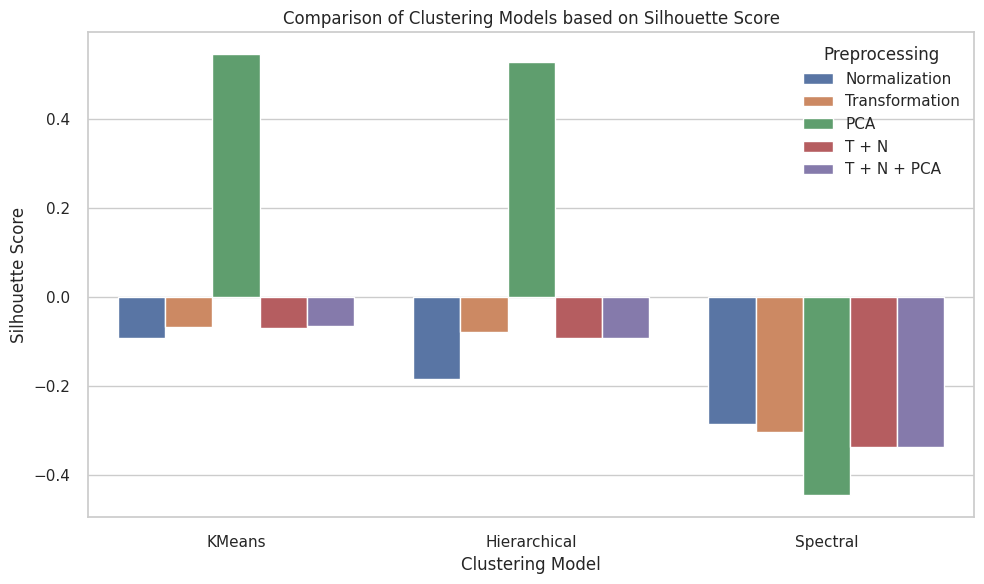

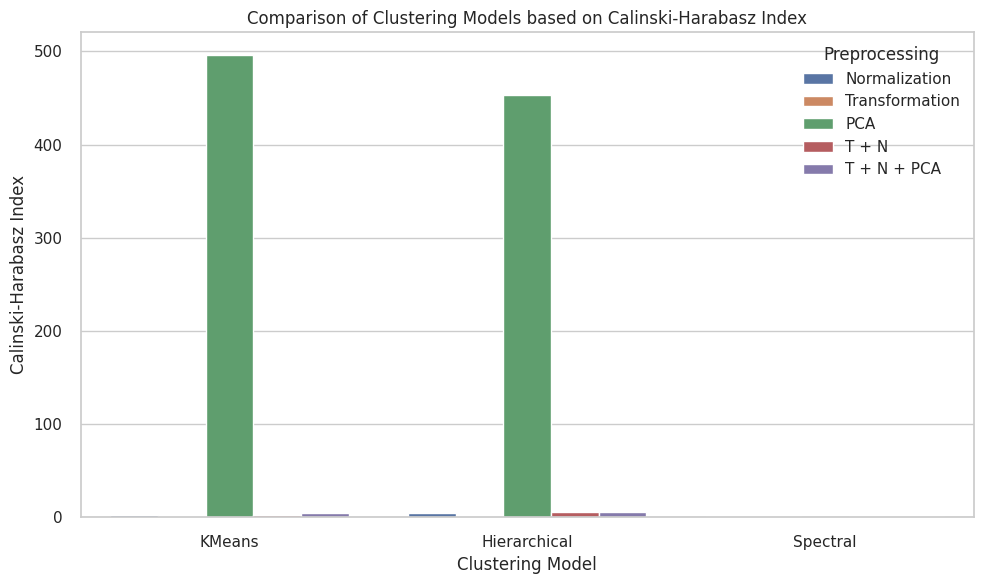

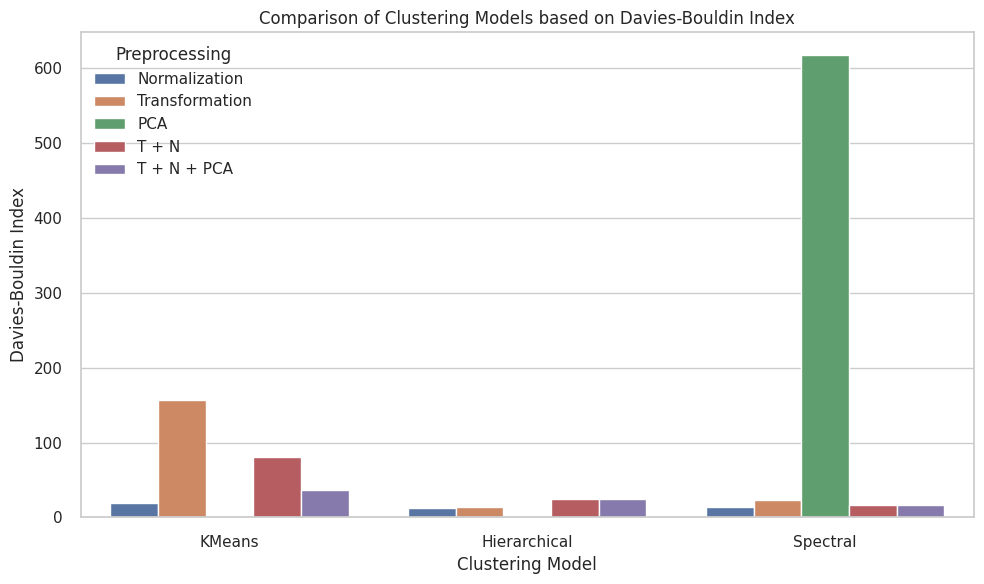

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load results
results_df = pd.read_csv('clustering_results.csv')

# Set up Seaborn for better aesthetics
sns.set(style="whitegrid")

# 1. Bar Plot for Silhouette Score comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Silhouette Score', hue='Preprocessing', ci=None)
plt.title('Comparison of Clustering Models based on Silhouette Score')
plt.ylabel('Silhouette Score')
plt.xlabel('Clustering Model')
plt.legend(title='Preprocessing', loc='upper right')
plt.tight_layout()
plt.show()

# 2. Bar Plot for Calinski-Harabasz Index comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Calinski-Harabasz Index', hue='Preprocessing', ci=None)
plt.title('Comparison of Clustering Models based on Calinski-Harabasz Index')
plt.ylabel('Calinski-Harabasz Index')
plt.xlabel('Clustering Model')
plt.legend(title='Preprocessing', loc='upper right')
plt.tight_layout()
plt.show()

# 3. Bar Plot for Davies-Bouldin Index comparison (lower is better)
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Davies-Bouldin Index', hue='Preprocessing', ci=None)
plt.title('Comparison of Clustering Models based on Davies-Bouldin Index')
plt.ylabel('Davies-Bouldin Index')
plt.xlabel('Clustering Model')
plt.legend(title='Preprocessing', loc='upper left')
plt.tight_layout()
plt.show()

In [47]:
from sklearn.preprocessing import MinMaxScaler

# Load the results CSV
results_df = pd.read_csv('clustering_results.csv')

# Remove 'Error' entries
results_df_clean = results_df[
    (results_df['Silhouette Score'] != 'Error') &
    (results_df['Calinski-Harabasz Index'] != 'Error') &
    (results_df['Davies-Bouldin Index'] != 'Error')
].copy()

# Convert to proper types
results_df_clean['Silhouette Score'] = results_df_clean['Silhouette Score'].astype(float)
results_df_clean['Calinski-Harabasz Index'] = results_df_clean['Calinski-Harabasz Index'].astype(float)
results_df_clean['Davies-Bouldin Index'] = results_df_clean['Davies-Bouldin Index'].astype(float)

# Normalize metrics
scaler = MinMaxScaler()
scaled = scaler.fit_transform(results_df_clean[['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index']])

# Invert Davies-Bouldin (lower is better)
scaled[:, 2] = 1 - scaled[:, 2]

# Add composite score
results_df_clean['Composite Score'] = (
    0.4 * scaled[:, 0] +
    0.4 * scaled[:, 1] +
    0.2 * scaled[:, 2]
)

# Step 1: Best config for each model
best_per_model = results_df_clean.loc[results_df_clean.groupby('Model')['Composite Score'].idxmax()].reset_index(drop=True)

print("Best Configuration for Each Model:\n")
print(best_per_model[['Model', 'Preprocessing', 'Clusters', 'Silhouette Score',
                      'Calinski-Harabasz Index', 'Davies-Bouldin Index', 'Composite Score']])

# Step 2: Overall best config
overall_best = best_per_model.loc[best_per_model['Composite Score'].idxmax()]
print("\nFinal Best Configuration Across All Models:\n")
print(overall_best[['Model', 'Preprocessing', 'Clusters', 'Silhouette Score',
                    'Calinski-Harabasz Index', 'Davies-Bouldin Index', 'Composite Score']])


Best Configuration for Each Model:

          Model Preprocessing  Clusters  Silhouette Score  \
0  Hierarchical           NaN         5             0.541   
1        KMeans           PCA         5             0.536   
2      Spectral         T + N         3            -0.063   

   Calinski-Harabasz Index  Davies-Bouldin Index  Composite Score  
0                    558.6                 0.490         0.966303  
1                    602.3                 0.509         0.993372  
2                      2.0                 5.454         0.359796  

Final Best Configuration Across All Models:

Model                        KMeans
Preprocessing                   PCA
Clusters                          5
Silhouette Score              0.536
Calinski-Harabasz Index       602.3
Davies-Bouldin Index          0.509
Composite Score            0.993372
Name: 1, dtype: object


In [49]:
# Setup with no preprocessing
s = setup(data=df.copy(), normalize=False, transformation=False, pca=True, verbose=False)

# Train model
kmeans_model = create_model('kmeans', num_clusters=5)

# Assign model
labeled_df = assign_model(kmeans_model)

# Get features and labels
X = get_config('X')
labels = labeled_df['Cluster']

# Manually compute metrics
sil = silhouette_score(X, labels)
ch = calinski_harabasz_score(X, labels)
db = davies_bouldin_score(X, labels)

print(f"Silhouette Score: {sil:.4f}")
print(f"Calinski-Harabasz Index: {ch:.4f}")
print(f"Davies-Bouldin Index: {db:.4f}")

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5339,602.9443,0.5062,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Silhouette Score: 0.5339
Calinski-Harabasz Index: 602.9443
Davies-Bouldin Index: 0.5062


In [51]:
plot_model(kmeans_model, plot='cluster')

In [52]:
plot_model(kmeans_model, plot = 'tsne')